*STANDERDIZATION AND NORMALIZATION*
- Standardization and Normalization are tow method to convert data values into same scale 
- it is also called scalling of data 
- in the data we have many columns are there each columns has diffrent units as well as diffrent values 
- for example you have age a salary, age is very minimal number two digits number 
-  and salary is kind of 5 digit number 
- when you multiply two digits number with 5 digit number if involves some complexity 
- scalling convert all the data into a same scale 

*Standardization:*
- It is also called Z-score or Z-scale
- It ranges -3 to 3
- The mean =0 and std=1
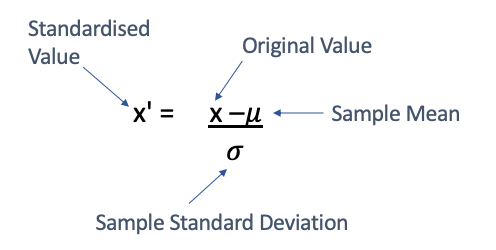
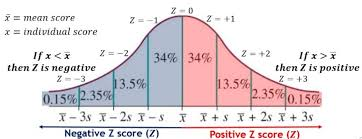


*Normalization*

- Min max scalar
- Normalization converts data into 0 to 1 range
- min value =0 and max value =1
- It mainly use in Deep learning for the image scaling
- Generally images are color images the pixel value ranges from 0 to 255
- We Normalize the values into 0 to 1
- The value might be change but information never change
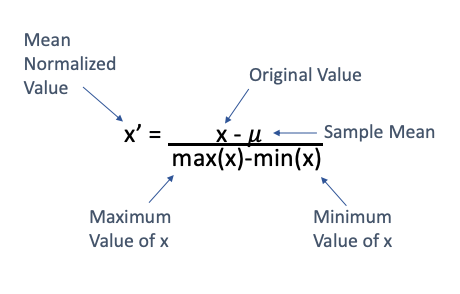

In [1]:
# Import the packages 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
# Read the data
file="C:\\Users\\SHWETA BHOYAR\\OneDrive\\Documents\\New folder\\Omkar sir PYTHON\\Full Stack Data Science @ 7_15 AM _ Mr.Omkar [6th Dec] Mr.Omkar-20231223T183622Z-001\\Excel data set\Visadataset.csv"
df=pd.read_csv(file)
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


*z-score*
- step1: we read a specific columns (prevailing wage)
- step2: calculate mean of the columns 
- step3 : calculate std of the columns 
- step4 Nr column-mean
- step5 :Nr/std

In [3]:
mean=df['prevailing_wage'].mean()
std=df['prevailing_wage'].std()
Nr=df['prevailing_wage']-mean
out=Nr/std
df['prevailing_wage_Zscore']=out

In [4]:
df[['prevailing_wage','prevailing_wage_Zscore']]

,prevailing_wage,prevailing_wage_Zscore
0,592.2029,-1.398510
1,83425.6500,0.169832
2,122996.8600,0.919060
3,83434.0300,0.169991
4,149907.3900,1.428576
...,...,...
25475,77092.5700,0.049923
25476,279174.7900,3.876083
25477,146298.8500,1.360253
25478,86154.7700,0.221504


In [5]:
max_original=df['prevailing_wage'].max()
max_z=df['prevailing_wage_Zscore'].max()
max_original,max_z

(319210.27, 4.634101837909902)

In [6]:
df['prevailing_wage'].idxmax()
# prevailing_wage column has maximum value at 21077 ID

21077

In [8]:
df['prevailing_wage_Zscore'].idxmax()
# prevailing_wage_Zscore column has maximum value at 21077 ID

21077

In [7]:
df.iloc[[21077]]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,prevailing_wage_Zscore
21077,EZYV21078,Asia,High School,N,N,442,2006,Midwest,319210.27,Year,Y,Denied,4.634102


In [9]:
min_original=df['prevailing_wage'].min()
min_z=df['prevailing_wage_Zscore'].min()
print(min_original,min_z)
print(df['prevailing_wage'].idxmin())
print(df['prevailing_wage_Zscore'].idxmin())

2.1367 -1.4096818992891214
20575
20575


*Influential outliers*

- Generaly Outlier means very very huge observation, very very small observation
- If we found an observation as outlier before scaling
- The same observation again found as outlier after scaling
- Then that observation called influential outlier
- Some observation before scaling consider as outlier
- But after scaling it does not fall in outlier creteria
- At that time we might not consider that observation as outlier
- Z-score is used to identify influential outliers

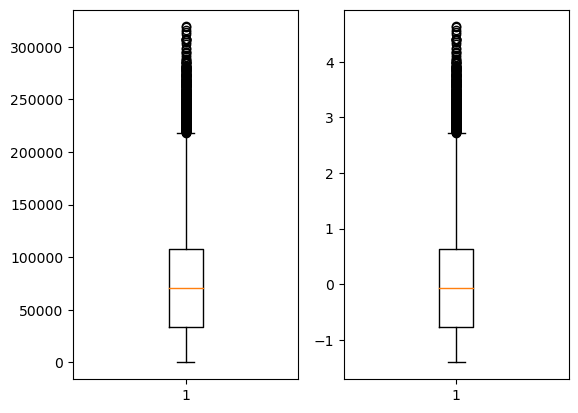

In [13]:
plt.subplot(1,2,1)
plt.boxplot(df['prevailing_wage'])
plt.subplot(1,2,2)
plt.boxplot(df['prevailing_wage_Zscore'])
plt.show()



*Using package- standerd scaller *

In [16]:
#Read the data 
# instead of LabelEncoder use StandardScalar
# Read the package
# Save the pacakge
# Apply fit transform
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df['prevailing_wage_Zscore']=ss.fit_transform(df[['prevailing_wage']])
df[['prevailing_wage','prevailing_wage_Zscore']]


,prevailing_wage,prevailing_wage_Zscore
0,592.2029,-1.398537
1,83425.6500,0.169835
2,122996.8600,0.919079
3,83434.0300,0.169994
4,149907.3900,1.428604
...,...,...
25475,77092.5700,0.049924
25476,279174.7900,3.876159
25477,146298.8500,1.360280
25478,86154.7700,0.221509


*Normalization*

- Read the again
- Step-1: Read the column
- Step-2: Calculate min value
- Step-3: Calculate max value
- Step-4: Nr= column-min
- Step-5: Dr= Max-min
- Step-6: out= Nr/Dr
- Step-7: Save in a new column

In [17]:
min_val=df['prevailing_wage'].min()
max_val=df['prevailing_wage'].max()
Nr=df['prevailing_wage']-min_val
Dr=max_val-min_val
out=Nr/Dr
df['prevailing_wage_norm']=out
df[['prevailing_wage','prevailing_wage_norm']]

,prevailing_wage,prevailing_wage_norm
0,592.2029,0.001849
1,83425.6500,0.261345
2,122996.8600,0.385312
3,83434.0300,0.261371
4,149907.3900,0.469616
...,...,...
25475,77092.5700,0.241505
25476,279174.7900,0.874579
25477,146298.8500,0.458311
25478,86154.7700,0.269895


In [18]:
df.iloc[[20575,21077]]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,prevailing_wage_Zscore,prevailing_wage_norm
20575,EZYV20576,North America,Master's,N,N,1552,2004,Northeast,2.1367,Hour,Y,Certified,-1.409710,0.0
21077,EZYV21078,Asia,High School,N,N,442,2006,Midwest,319210.2700,Year,Y,Denied,4.634193,1.0


*Using package: MinMaxScalar*

In [20]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
df['prevailing_wage_norm']=mms.fit_transform(df[['prevailing_wage']])
df[['prevailing_wage','prevailing_wage_norm']]

,prevailing_wage,prevailing_wage_norm
0,592.2029,0.001849
1,83425.6500,0.261345
2,122996.8600,0.385312
3,83434.0300,0.261371
4,149907.3900,0.469616
...,...,...
25475,77092.5700,0.241505
25476,279174.7900,0.874579
25477,146298.8500,0.458311
25478,86154.7700,0.269895


*fit_transform*

- There are two terms fit and transform
- If you see in z-score
    - x: data
    - mean: mean of data
    - std: std of data
- Will find the value of mean and std, this is called fit
- Once we find the values we need apply on entire data, this is called transform
- fit transform calculate the measurements(parameters or statistic) and apply on data

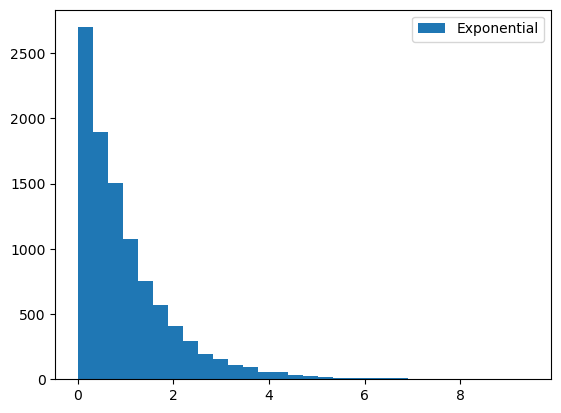

In [24]:
plt.hist(exp_data,bins=30,label='Exponential')
plt.legend()
plt.show()

Norm − data